# A Parametric Spline Interpolation of My Nickname

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Defining functions for the generation of the interpolation function as well as the interpolation function itself

In [2]:
def generate_spline(x, y):
    '''
     S = generate_spline(x, y)

     Input:
       x and y are arrays (or lists) of corresponding x- and y-values,
       specifying the points in the x-y plane.  The x-values
       must be in increasing order.

     Output:
       S is a function that takes x or an array (or list) of x-values
         It evaluates the cubic spline and returns the interpolated value.
    '''
    n = len(x)
    h = np.zeros(n-1)
    a = np.zeros(n)
    b = np.zeros(n-1)
    c = np.zeros(n-1)

    M = np.zeros((n, n))
    r = np.zeros(n)


    for k in range(n-1):
        h[k] = x[k+1] - x[k]

    for k in range(1, n-1):
        r[k] = ((y[k+1] - y[k])/h[k]) - ((y[k]-y[k-1])/h[k-1])

    M[0, 0] = 1
    M[n-1, n-1] = 1

    for k in range(1, n-1):
        M[k, k-1] = h[k-1]/6
        M[k, k] = (h[k-1]+h[k])/3
        M[k, k+1] = h[k]/6

    sol: np.ndarray = np.linalg.solve(M, r)
    a = sol

    for k in range(n-1):
        b[k] = (y[k]/h[k]) - a[k]*(h[k]/6)
        c[k] = (y[k+1]/h[k]) - a[k+1]*(h[k]/6)


    # This is the function that gets returned.
    # It evaluates the cubic spline at xvals.
    #
    def spline(xvals, x=x, a=a, b=b, c=c):
        '''
         S = spline(xvals)

         Evaluates the cubic spline at xvals.

         Inputs:
          xvals can be list-like, or a scalar (**must be in ascending order**)

         Output:
          S is a list of values with the same number of elements as x
        '''
        # Turn non-list-like input into list-like
        if type(xvals) not in (list, np.ndarray,):
            xvals = [xvals]

        S = []  # The return list of values

        #
        k = 0   # this is the current polynomial piece
        hk = x[k+1] - x[k]

        for xx in xvals:

            # While the next x-value is not on the current piece...
            while xx > x[k+1]:
                # ... Go to next piece
                k += 1
                hk = x[k+1] - x[k]

            S_of_x = a[k]*(x[k+1]-xx)**3/(6*hk) + a[k+1]*(xx-x[k]
                                                          )**3/(6*hk) + b[k]*(x[k+1]-xx) + c[k]*(xx-x[k])

            S.append(S_of_x)

        return S

    return spline


In [3]:
def distance(x1, y1, x2, y2):
    return np.sqrt(((x2-x1)**2)+((y2-y1)**2))


def parametric_spline(Sx, Sy):
    '''
     x_cs, y_cs, t = parametric_spline(Sx,Sy)

       Takes an array of x- and y-values, and returns a parametric
       cubic spline in the form of two piecewise-cubic data structures
       (one for the x-component and one for the y-component), as well as
       the corresponding parameter values.

       The splines use natural boundary conditions.

       Input:
        Sx   array of x-values
        Sy   array of y-values

       Output:
        x_cs function that evaluates the cubic spline for x-component
        y_cs function that evaluates the cubic spline for y-component
        t is the array of parameter values use for the splines

       Note that x_cs(t) and y_cs(t) give Sx and Sy, respectively.
    '''

    t = np.zeros_like(Sx)
    t_val = 0
    for i in range(len(t)-1):
        t_val += distance(Sx[i], Sy[i], Sx[i+1], Sy[i+1])
        t[i+1] = float(t_val)

    x_cs = generate_spline(t, Sx)
    y_cs = generate_spline(t, Sy)

    return x_cs, y_cs, t


We now need the x- and y- coordinates of the points between which we wish our functions to interpolate this. To achieve this, a separate python script (see genpoints.py) was used to serialize the coordinates of the points for each character in the nickname into text files. Then, the coordinates' x- and y- values were copied by hand into the cell below.

In [4]:
x1 = [73.06016410125449, 221.92570402054218, 356.7676785851145, 444.14527810295726, 458.16884345767266,
      260.76019269513904, 92.47740843855297, 74.13889989777113, 177.6975363633626, 437.67286332385765, 507.79069009743534]
y1 = [1102.6852582119634, 1105.921465601513, 1115.6300877701624, 1131.8111247179108, 1179.2754997646402,
      1356.188170393359, 1537.415784208144, 1588.1163666444234, 1604.297403592172, 1591.352574033973, 1591.352574033973]

x2 = [555.3346583529343, 610.1227748073654, 664.9108912617967, 692.8122468635904, 662.8817017634844,
      604.5425036870067, 552.798171480044, 561.4222268478711, 627.8781829175978, 718.1771155924937]
y2 = [1369.8121370230192, 1385.5383556349393, 1373.870516019644, 1344.447268294116, 1300.8196940804023,
      1297.2686124583556, 1345.9691604178502, 1416.4834954842015, 1463.1548539453836, 1460.6183670724934]

x3 = [773.1802503306899, 773.1802503306899, 768.492122869072,
      780.2124415231169, 811.4666246005702, 863.8173812553044, 901.3224009482484]
y3 = [1311.0319400909166, 1402.4504255924674, 1496.2129748248271,
      1409.4826167848944, 1311.813294667853, 1243.0540918974557, 1254.7744105515008]

x4 = [1144.7322236921118, 1130.551221221148, 1084.4629631905152, 1017.1032014534368, 969.2423181139337,
      958.6065662607108, 1000.2632610191672, 1055.2146455941522, 1135.8690971477592, 1141.1869730743706]
y4 = [1459.160557686076, 1265.944399019193, 1163.132131104705, 1145.4058780159999, 1255.3086471659701,
      1455.615307068335, 1591.221143196927, 1628.446274683207, 1513.2256296066257, 1480.4320613925217]

x5 = [1217.7613251403159, 1595.1380927876476]
y5 = [1356.1327175424135, 1341.9633770800608]

x6 = [1767.2017293909375, 1984.3250057103496, 2090.857454371743, 2106.0763756090855, 1975.1936529679444,
      1848.3693093234278, 1745.8952396586587, 1701.2530706957887, 1742.8514554111903, 1836.1941723335544, 1921.4201312626694]
y6 = [1371.0045190934495, 1343.610460866234, 1357.8147873544199, 1410.5737143105387, 1530.2958947109623,
      1548.5586001957727, 1483.6245362497802, 1351.727218859483, 1232.0050384590595, 1153.8812427740372, 1182.289895750409]


# some sanity checks. All of these should evaluate to True.
print(len(x1) == len(y1))
print(len(x2) == len(y2))
print(len(x3) == len(y3))
print(len(x4) == len(y4))
print(len(x5) == len(y5))
print(len(x6) == len(y6))


True
True
True
True
True
True


### Finding parametric splines for each character in the nickname:

In [5]:
spline_x1, spline_y1, t_s1 = parametric_spline(x1, y1)
spline_x2, spline_y2, t_s2 = parametric_spline(x2, y2)
spline_x3, spline_y3, t_s3 = parametric_spline(x3, y3)
spline_x4, spline_y4, t_s4 = parametric_spline(x4, y4)
spline_x5, spline_y5, t_s5 = parametric_spline(x5, y5)
spline_x6, spline_y6, t_s6 = parametric_spline(x6, y6)

### Generating the segments corresponding to each character

In [6]:
t_p_x1 = []
t_p_x2 = []
t_p_x3 = []
t_p_x4 = []
t_p_x5 = []
t_p_x6 = []
t = 0
while t < t_s1[-1]:
    t_p_x1.append(t)
    t += 10
t = 0
while t < t_s2[-1]:
    t_p_x2.append(t)
    t += 10
t = 0
while t < t_s3[-1]:
    t_p_x3.append(t)
    t += 10
t = 0
while t < t_s4[-1]:
    t_p_x4.append(t)
    t += 10
t = 0
while t < t_s5[-1]:
    t_p_x5.append(t)
    t += 10
t = 0
while t < t_s6[-1]:
    t_p_x6.append(t)
    t += 10
p_x1 = spline_x1(t_p_x1)
p_y1 = spline_y1(t_p_x1)


p_x2 = spline_x2(t_p_x2)
p_y2 = spline_y2(t_p_x2)

p_x3 = spline_x3(t_p_x3)
p_y3 = spline_y3(t_p_x3)

p_x4 = spline_x4(t_p_x4)
p_y4 = spline_y4(t_p_x4)

p_x5 = spline_x5(t_p_x5)
p_y5 = spline_y5(t_p_x5)

p_x6 = spline_x6(t_p_x6)
p_y6 = spline_y6(t_p_x6)


### Plotting the segments

(the resulting plot should resemble the word 'Zer0-G'.)

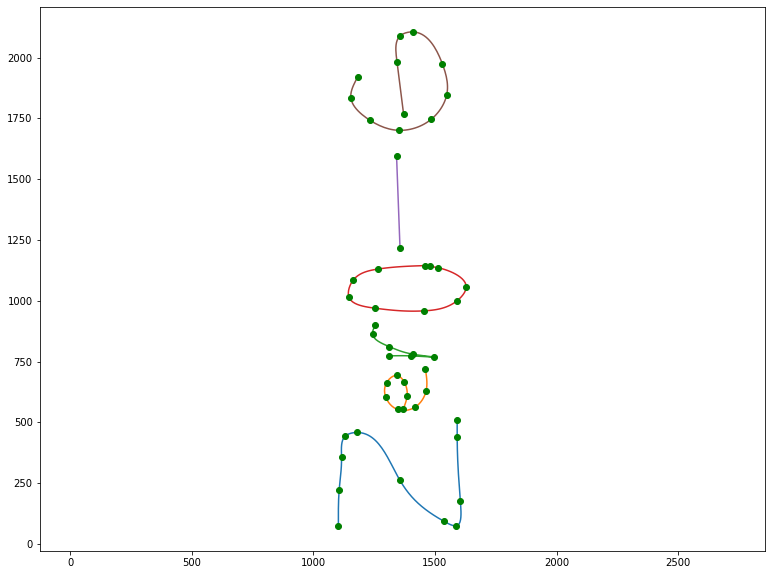

In [7]:
plt.figure(figsize=(13, 10))


plt.plot(p_y1, p_x1)
plt.plot(p_y2, p_x2)
plt.plot(p_y3, p_x3)
plt.plot(p_y4, p_x4)
plt.plot(p_y5, p_x5)
plt.plot(p_y6, p_x6)

for i in range(len(x1)):
    plt.plot(y1[i], x1[i], 'go')
for i in range(len(x2)):
    plt.plot(y2[i], x2[i], 'go')
for i in range(len(x3)):
    plt.plot(y3[i], x3[i], 'go')
for i in range(len(x4)):
    plt.plot(y4[i], x4[i], 'go')
for i in range(len(x5)):
    plt.plot(y5[i], x5[i], 'go')
for i in range(len(x6)):
    plt.plot(y6[i], x6[i], 'go')

plt.axis('equal')

plt.show()
